In [1]:
#import Librerie
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # Necessario per la visualizzazione 3D

In [29]:
#recupero i dataset preprocessati 
def load_data():
    ds = pd.read_csv("../../data/processed/pendigits_standardized.csv")

    #estraggo le features e i targets
    X = ds.drop(columns = "target")
    y = ds["target"]
    
    return X, y

In [30]:
#faccio 4 procedimenti complementari, uno con i dati raw, uno con i dati normalizzati, uno con i dati standardizzati e uno con le componenti principali estratte tramite la pca, durante l'esplorazione del 
#dataset abbiamo notato come il 90% della varianza viene spiegato dalle prime 8 componenti.
X, y = load_data()
#inizializzo lo standardizzatore
scaler = StandardScaler()

#standardizzo i dati (media 0 e varianza 1)
X_std = scaler.fit_transform(X)

#normalizzo i dati (valori tra 0 e 1)
X_norm = (X - X.min()) / (X.max() - X.min())

#applico pca con 8 componenti principali
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_std)

#creo una lista con i tre dataset
datasets = [X, X_std, X_norm, X_pca]
datasets_names = ["Raw", "Standardized", "Normalized", "Extracted"]


In [31]:
#carico il modello kmeans
#il parametro n_init='auto' indica quante volte verranno generati i nuovi centroidi
#10 cluster poiché le cifre disegnate vanno da 0 a 9
columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8']

#per ogni dataset eseguo il kmeans e prendo centroidi e labels
for i, X in enumerate(datasets):
    kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
    kmeans.fit(X) 
    labels = kmeans.labels_
    df_pca = pd.DataFrame()

    #riduco le dimensioni per poter fare il plot
    #creo un dataframe con i dati ridotti e i cluster
    if (i < 3):
        pca = PCA(n_components=8)
        reduced_data = pca.fit_transform(X)
        reduced_centers = pca.transform(kmeans.cluster_centers_)
        df_pca = pd.DataFrame(reduced_data, columns=columns)
        
    else:
        df_pca = pd.DataFrame(X, columns=columns)

    #aggiungo i cluster al dataset
    df_pca['Cluster'] = kmeans.labels_

    #plotto i dati
    plt.figure(figsize=(14, 6))
    for cluster in range(10):
        cluster_data = df_pca[df_pca['Cluster'] == cluster]
        plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

    plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], marker='x', s=200, c='red', label='Centroids')
    plt.title(f'Clustering with K-Means: {datasets_names[i]}')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend()
    plt.show()

    #calcolo i valori di similarità
    ari = adjusted_rand_score(y, labels)
    nmi = normalized_mutual_info_score(y, labels)
    hom = homogeneity_score(y, labels)
    comp = completeness_score(y, labels)
    vms = v_measure_score(y, labels)

    print(f"Metriche con Dataset: {datasets_names[i]}")
    print(f"ARI: {ari}")
    print(f"NMI: {nmi}")
    print(f"Homogeneity: {hom}")
    print(f"Completeness: {comp}")
    print(f"V-Measure: {vms}")
    print("\n")

/Users/marcocosseddu/Documents/Università/Magistrale/primo_anno/Data Mining/Progetto/pendigits-clustering-01/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


KeyError: 'Cluster'

<Figure size 1400x600 with 0 Axes>

/Users/marcocosseddu/Documents/Università/Magistrale/primo_anno/Data Mining/Progetto/pendigits-clustering-01/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


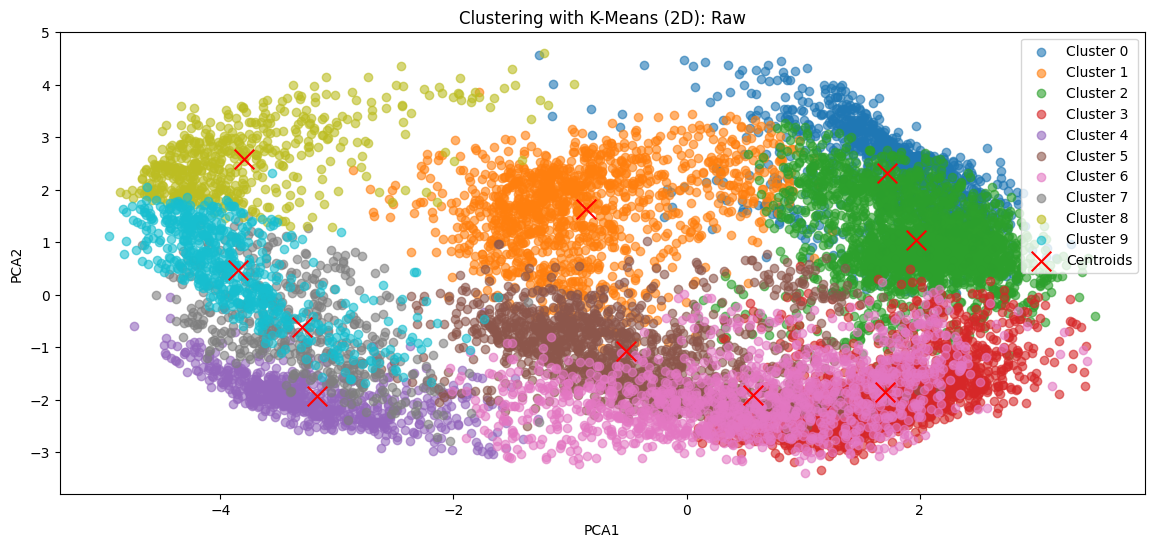

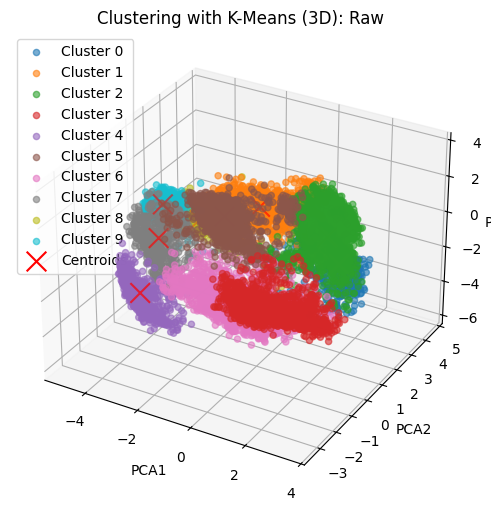

Metriche con Dataset: Raw
ARI: 0.5411192499803225
NMI: 0.6913261688637581
Homogeneity: 0.6736782030604491
Completeness: 0.7099236357092658
V-Measure: 0.6913261688637581




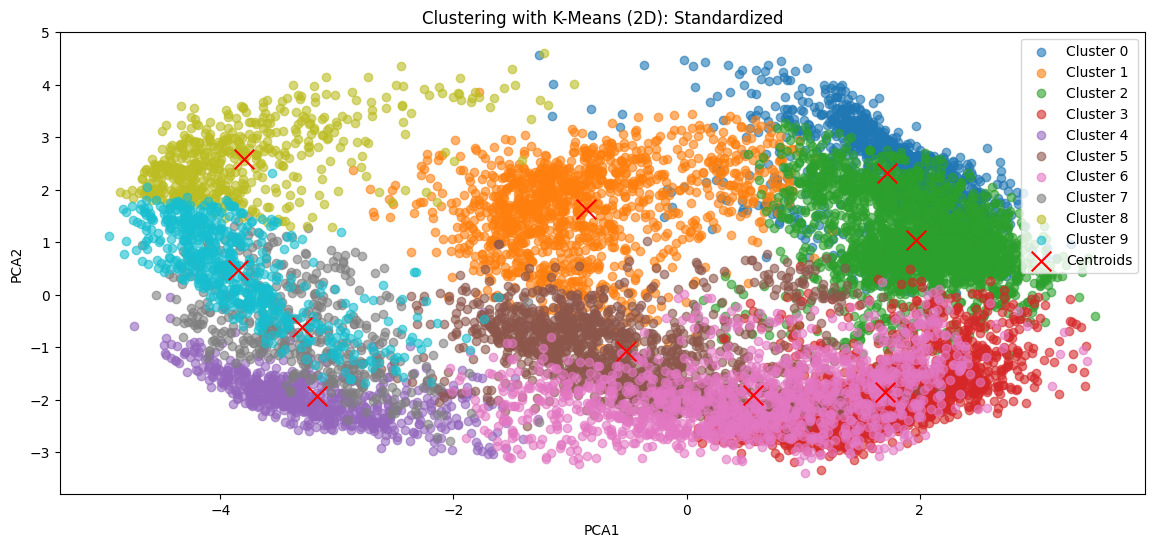

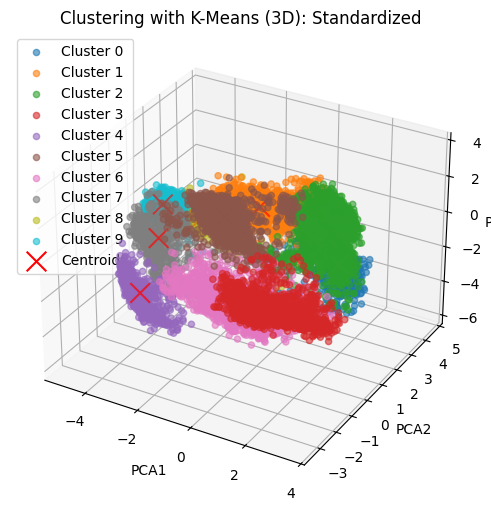

Metriche con Dataset: Standardized
ARI: 0.5411192499803225
NMI: 0.6913261688637581
Homogeneity: 0.6736782030604491
Completeness: 0.7099236357092658
V-Measure: 0.6913261688637581




/Users/marcocosseddu/Documents/Università/Magistrale/primo_anno/Data Mining/Progetto/pendigits-clustering-01/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


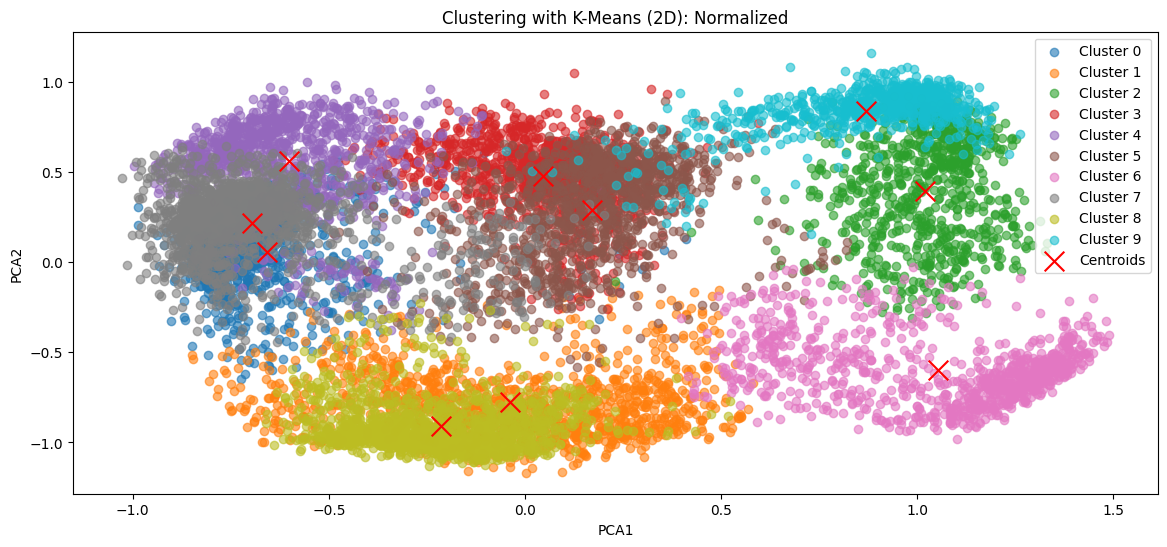

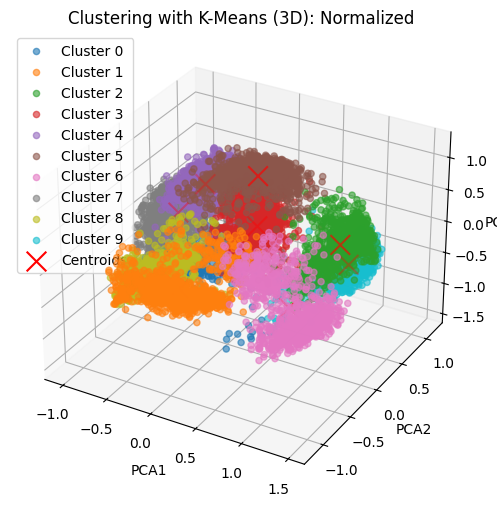

Metriche con Dataset: Normalized
ARI: 0.5713618624905403
NMI: 0.6793107667348349
Homogeneity: 0.6748961234140318
Completeness: 0.6837835446237911
V-Measure: 0.6793107667348349




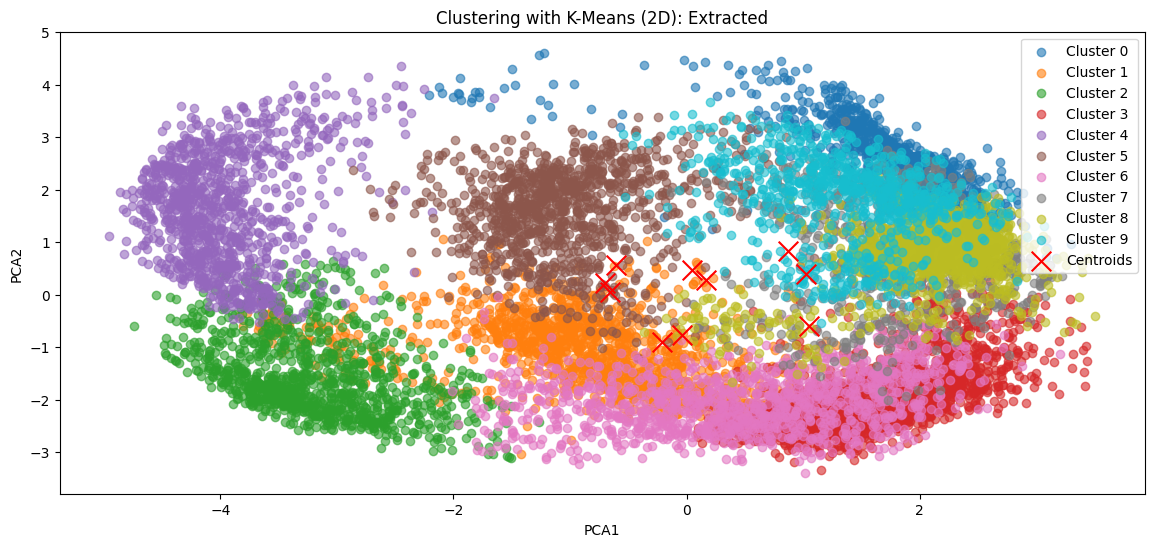

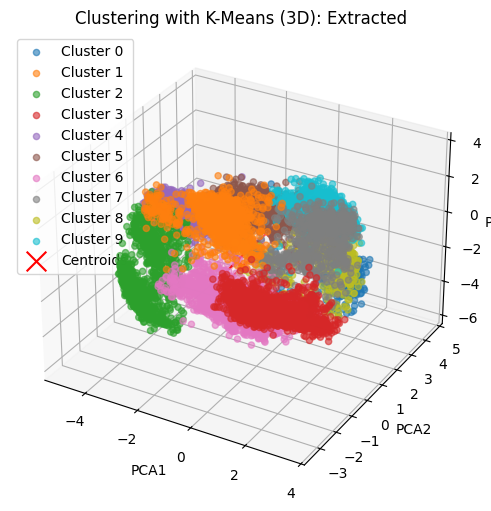

Metriche con Dataset: Extracted
ARI: 0.6051288052657421
NMI: 0.6985593206642814
Homogeneity: 0.6947111029734262
Completeness: 0.7024504087414654
V-Measure: 0.6985593206642813




In [33]:
# Parametri PCA
columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8']
columns_2d = ['PCA1', 'PCA2']
columns_3d = ['PCA1', 'PCA2', 'PCA3']

# Per ogni dataset eseguo il k-means, plottando in 2D e 3D
for i, X in enumerate(datasets):
    # Carico il modello KMeans
    kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
    kmeans.fit(X)
    labels = kmeans.labels_

    # Riduzione dimensionale per i plot
    if (i < 3):
        pca = PCA(n_components=8)
        reduced_data = pca.fit_transform(X)
        reduced_centers = pca.transform(kmeans.cluster_centers_)
        df_pca = pd.DataFrame(reduced_data, columns=columns)
        
    else:
        df_pca = pd.DataFrame(X, columns=columns)
    
    df_pca['Cluster'] = kmeans.labels_
    
    # Plot 2D
    plt.figure(figsize=(14, 6))
    for cluster in range(10):
        cluster_data = df_pca[df_pca['Cluster'] == cluster]
        plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

    plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], marker='x', s=200, c='red', label='Centroids')
    plt.title(f'Clustering with K-Means (2D): {datasets_names[i]}')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend()
    plt.show()

    # Plot 3D
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(111, projection='3d')
    for cluster in range(10):
        cluster_data = df_pca[df_pca['Cluster'] == cluster]
        ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster}', alpha=0.6)

    ax.scatter(reduced_centers[:, 0], reduced_centers[:, 1], reduced_centers[:, 2], marker='x', s=200, c='red', label='Centroids')
    ax.set_title(f'Clustering with K-Means (3D): {datasets_names[i]}')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    ax.legend()
    plt.show()

    # Calcolo delle metriche
    ari = adjusted_rand_score(y, labels)
    nmi = normalized_mutual_info_score(y, labels)
    hom = homogeneity_score(y, labels)
    comp = completeness_score(y, labels)
    vms = v_measure_score(y, labels)

    print(f"Metriche con Dataset: {datasets_names[i]}")
    print(f"ARI: {ari}")
    print(f"NMI: {nmi}")
    print(f"Homogeneity: {hom}")
    print(f"Completeness: {comp}")
    print(f"V-Measure: {vms}")
    print("\n")
